In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from sklearn import preprocessing

df= pd.read_excel('titanic.xls')
df.drop(['body', 'name'], 1, inplace= True)
#for column in df.columns:
#    pd.to_numeric(df[column])
#print(df.head())

def handle_non_numeric_data(df):
    columns= df.columns.values
    
    for column in columns:
        text_digit_vals={}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_content=df[column].values.tolist()
            #print(column_content)
            unique_elements= set(column_content)
            #print(unique_elements)
            x=0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    #print(unique)
                    x+=1
            df[column] = list(map(convert_to_int, df[column]))
    return df

df= handle_non_numeric_data(df)
df.dropna(inplace=True)
print(df.head())

   pclass  survived  sex      age  sibsp  parch  ticket      fare  cabin  \
0       1         1    1  29.0000      0      0     760  211.3375     78   
1       1         1    0   0.9167      1      2     529  151.5500    159   
2       1         0    1   2.0000      1      2     529  151.5500    159   
3       1         0    0  30.0000      1      2     529  151.5500    159   
4       1         0    1  25.0000      1      2     529  151.5500    159   

   embarked  boat  home.dest  
0         1     1        360  
1         1    18        239  
2         1     0        239  
3         1     0        239  
4         1     0        239  


In [2]:
df.drop(['home.dest', 'embarked'], 1, inplace=True)
X= np.array(df.drop(['survived'], 1).astype(float))
X= preprocessing.scale(X)#preprocessing(X)
Y= np.array(df['survived'])

clf= KMeans(n_clusters=2)
clf.fit(X)

correct=0
total=0

for i in range(len(X)):
    value= np.array(X[i].astype(float))
    value= value.reshape(-1, len(value))
    
    valueresult= clf.predict(value)
    #print(value)
    #print(valueresult)
    
    if valueresult[0]== Y[i]:
        correct+=1
    total+=1
    
print(correct/total)

0.6746411483253588


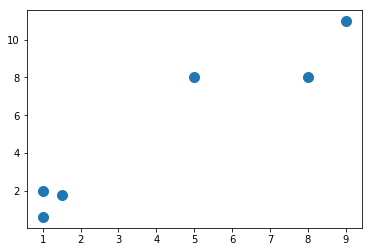

{0: array([1.16666667, 1.46666667]), 1: array([7.33333333, 9.        ])}


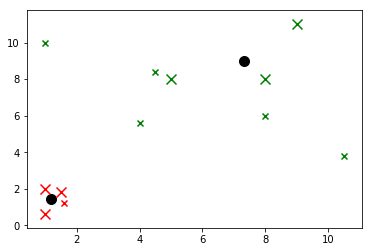

In [31]:
#FromScratch
X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])

plt.scatter(X[:, 0], X[:, 1], s= 100)
plt.show()

colors=['r', 'g' ]

class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k= k
        self.tol= tol
        self.max_iter= max_iter
        
    def fit(self, data):
        self.centroids={}
        x=0
        for i in range(self.k):
            self.centroids[i]= data[i]
        
        for i in range(self.max_iter):
            self.classifications = {}
            
            for i in range(self.k):
                self.classifications[i]=[]
            
            for featureset in data:
                distances= [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification= distances.index(min(distances))
                self.classifications[classification].append(featureset)
            
            prev_centroids= dict(self.centroids)

            #print(self.classifications)
            #rint(np.average(self.classifications[0]))
            for classification in self.classifications:
                self.centroids[classification]= np.average(self.classifications[classification], axis=0) 
            optimized= True
            #print(self.centroids)
                
            for  c in self.centroids:
                original_centroid= prev_centroids[c]
                current_centroid= self.centroids[c]
                if np.sum((current_centroid- original_centroid)/original_centroid*100) > self.tol:
                    optimized= False
            if optimized:
                break
    
    def predict(self, data):
        distances= [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification= distances.index(min(distances))
        return classification
    
clf= K_Means()
clf.fit(X)
print(clf.centroids)
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], marker='o', color='k', s=100)

for classification in clf.classifications:
    color= colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker='x', color= color, s= 100 )

unknowns=  np.array([[1.6, 1.2], [10.5, 3.8], [4.5, 8.4], [8, 6], [4, 5.6], [1, 10]])
for unknown in unknowns:
    classification= clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], color= colors[classification], marker= 'x')
    
plt.show()

In [33]:
X= np.array(df.drop(['survived'], 1).astype(float))
X= preprocessing.scale(X)#preprocessing(X)
Y= np.array(df['survived'])

clf= K_Means()
clf.fit(X)

correct=0
total=0

for i in range(len(X)):
    value= np.array(X[i].astype(float))
    value= value.reshape(-1, len(value))
    
    valueresult= clf.predict(value)
    #print(value)
    #print(valueresult)
    
    if valueresult== Y[i]:
        correct+=1
    total+=1
    
print(correct/total)

0.6583732057416268
